# Introduction

This project examined and compared the performance of three machine learning algorithms at predicting telecom users that will churn in the nearest future. The dataset used was the "telecom-users-Data" which is available on Kaggle at https://www.kaggle.com/radmirzosimov/telecom-users-dataset.  

# Initial Steps

This consists of packages import, data loading, and premilinary data viewing.

Import packages:

In [139]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import scipy.stats as ss
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

## Load and view data

In [140]:
df = pd.read_csv("telecom_users.csv") #load data
df.head() #view data

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


It is better to make customer ID the index field so, the unnamed column is dropped

In [141]:
# drop unnamed column
df.index = df["customerID"]
df.drop(columns = ["Unnamed: 0", "customerID"], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5986 entries, 7010-BRBUU to 4795-UXVCJ
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   SeniorCitizen     5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  PaymentMethod     5986 non-null 

It is important to get an overview of the data structure and to see how Pandas is treating each variables.

# Data Cleaning

It is obvious from the above, that there are no missing values in the data.

However, the data must further be checked for empty spaces and invalid values.

In [142]:
(df.astype(np.object)==' ').sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

All of the fields have no empty spaces except "TotalCharges" where 10 records have empty spaces.

So, these records are removed thus:

In [143]:
df = df[df['TotalCharges']!=' ']

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5976 entries, 7010-BRBUU to 4795-UXVCJ
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5976 non-null   object 
 1   SeniorCitizen     5976 non-null   int64  
 2   Partner           5976 non-null   object 
 3   Dependents        5976 non-null   object 
 4   tenure            5976 non-null   int64  
 5   PhoneService      5976 non-null   object 
 6   MultipleLines     5976 non-null   object 
 7   InternetService   5976 non-null   object 
 8   OnlineSecurity    5976 non-null   object 
 9   OnlineBackup      5976 non-null   object 
 10  DeviceProtection  5976 non-null   object 
 11  TechSupport       5976 non-null   object 
 12  StreamingTV       5976 non-null   object 
 13  StreamingMovies   5976 non-null   object 
 14  Contract          5976 non-null   object 
 15  PaperlessBilling  5976 non-null   object 
 16  PaymentMethod     5976 non-null 

Most of the data types assigned by Pandas are consistent with the original data description except for "SeniorCitizen", and "TotalCharges" features which are supposed to be categorical and float variables respectively. Therefore, these variables are assigned the correct data types as follows:

In [145]:
#first decode the "SeniorCitizen" to "Yes" and "No" for visualisation purpose
df["SeniorCitizen"] = df["SeniorCitizen"].replace(0,"No")
df["SeniorCitizen"] = df["SeniorCitizen"].replace(1,"Yes")

#convert data type
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5976 entries, 7010-BRBUU to 4795-UXVCJ
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5976 non-null   object 
 1   SeniorCitizen     5976 non-null   object 
 2   Partner           5976 non-null   object 
 3   Dependents        5976 non-null   object 
 4   tenure            5976 non-null   int64  
 5   PhoneService      5976 non-null   object 
 6   MultipleLines     5976 non-null   object 
 7   InternetService   5976 non-null   object 
 8   OnlineSecurity    5976 non-null   object 
 9   OnlineBackup      5976 non-null   object 
 10  DeviceProtection  5976 non-null   object 
 11  TechSupport       5976 non-null   object 
 12  StreamingTV       5976 non-null   object 
 13  StreamingMovies   5976 non-null   object 
 14  Contract          5976 non-null   object 
 15  PaperlessBilling  5976 non-null   object 
 16  PaymentMethod     5976 non-null 

# Data Visualization and Exploration

Now, that all the variables are of the right data types, we check for all other possible invalid values while simultaneously drawing insight from the distribution of each variable. Preliminary investigations of relationships are also carried out to formulate the hypotheses.

The variables are divided into numerical and categorical.

In [147]:
cat_variables = df.select_dtypes(["object"]).columns.tolist() #extract categorical variables
num_variables = df.select_dtypes(["int64", "float"]).columns.tolist() #extract numerical variables

print("Categorical variables: ", cat_variables)
print("Numerical variables: ", num_variables)

Categorical variables:  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Numerical variables:  ['tenure', 'MonthlyCharges', 'TotalCharges']


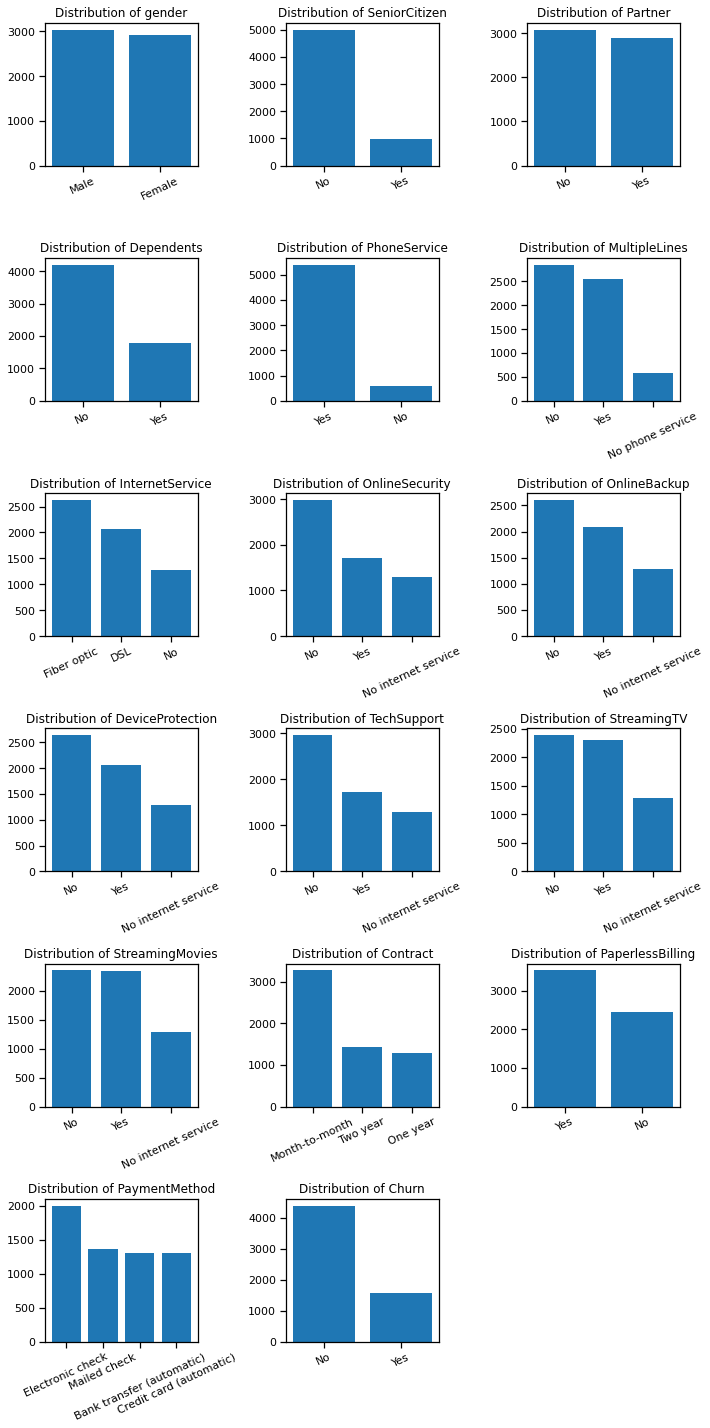

In [148]:
def plot_cat_distribution(dataset,columns):
    cols=3
    rows=np.ceil(len(columns)/cols)
    plt.figure(figsize=(10,20))
    for i,col in enumerate(columns):
        plt.subplot(rows,cols,i+1)
        names=dataset[col].value_counts().keys()
        values=dataset[col].value_counts().values
        plt.bar(names,values)
        plt.title("Distribution of {}".format(col))
        plt.xticks(rotation=25)
        plt.tight_layout()
        
plot_cat_distribution(df,cat_variables)

In [149]:
df[num_variables].describe()

,tenure,MonthlyCharges,TotalCharges
count,5976.000000,5976.000000,5976.000000
mean,32.523092,64.846687,2298.060617
std,24.500858,30.107576,2274.127165
min,1.000000,18.250000,18.800000
25%,9.000000,35.750000,404.312500
50%,29.000000,70.425000,1412.150000
75%,56.000000,89.900000,3846.962500
max,72.000000,118.750000,8684.800000


The above shows that there are no invalid values left in any of the fields (both the label and features).

However, we can already see that the label class is not balanced. The extent of the class imbalance is showed with the aid of a pie chart below:

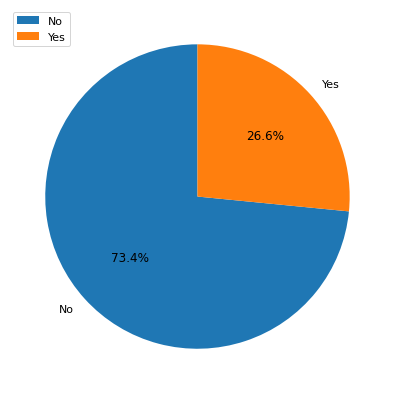

In [150]:
# extract and count frequencies under each category of Churn field
churn_table = df['Churn'].value_counts().reset_index()
churn_table.columns = ['Churn?',"Number_of_customers"]
fig = plt.figure(figsize =(10, 7))
plt.pie(churn_table['Number_of_customers'], labels=churn_table['Churn?'], autopct='%1.1f%%', startangle = 90)
plt.legend()
plt.show() 

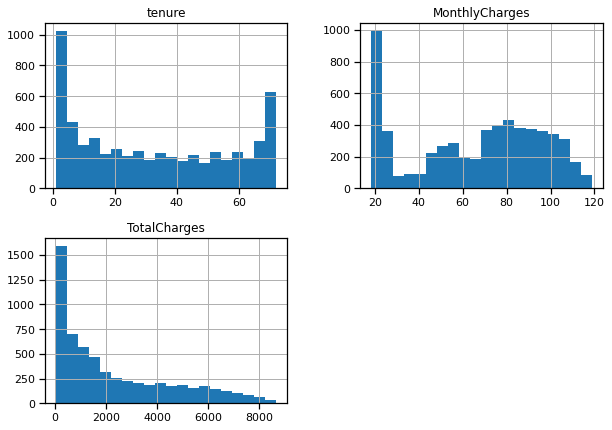

In [151]:
%matplotlib inline  
df[num_variables].hist(bins=20, figsize=(10,7))
plt.show()

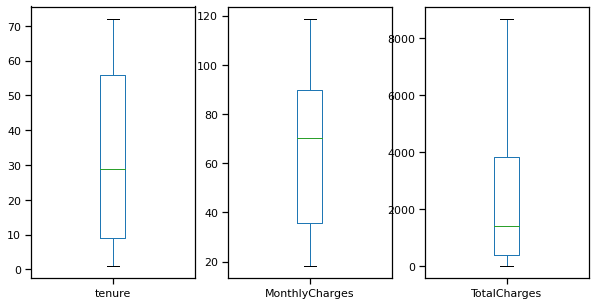

In [152]:
# create box and whisker plots for numerical variables

df[num_variables].plot(kind='box', subplots=True, figsize=(10,5), sharex=False, sharey=False)
plt.show()

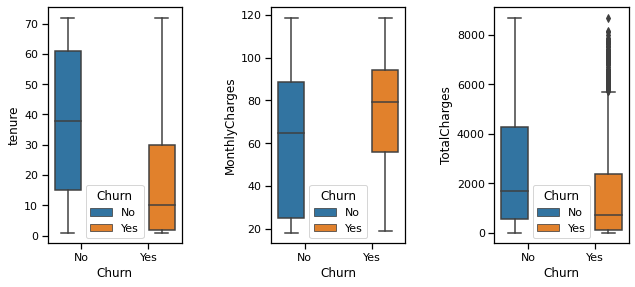

In [153]:
fig,ax=plt.subplots(1,3,figsize=(10, 5))
fig.tight_layout(pad=5)
for y in num_variables:
    i= num_variables.index(y)
    sns.boxplot(ax=ax[i],y=y, x='Churn',data=df,hue='Churn');

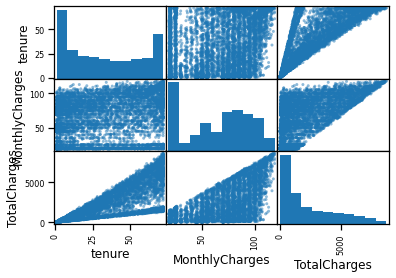

In [154]:
# create scatter plot matrix for the numerical variables
scatter_matrix(df[num_variables])
plt.show()

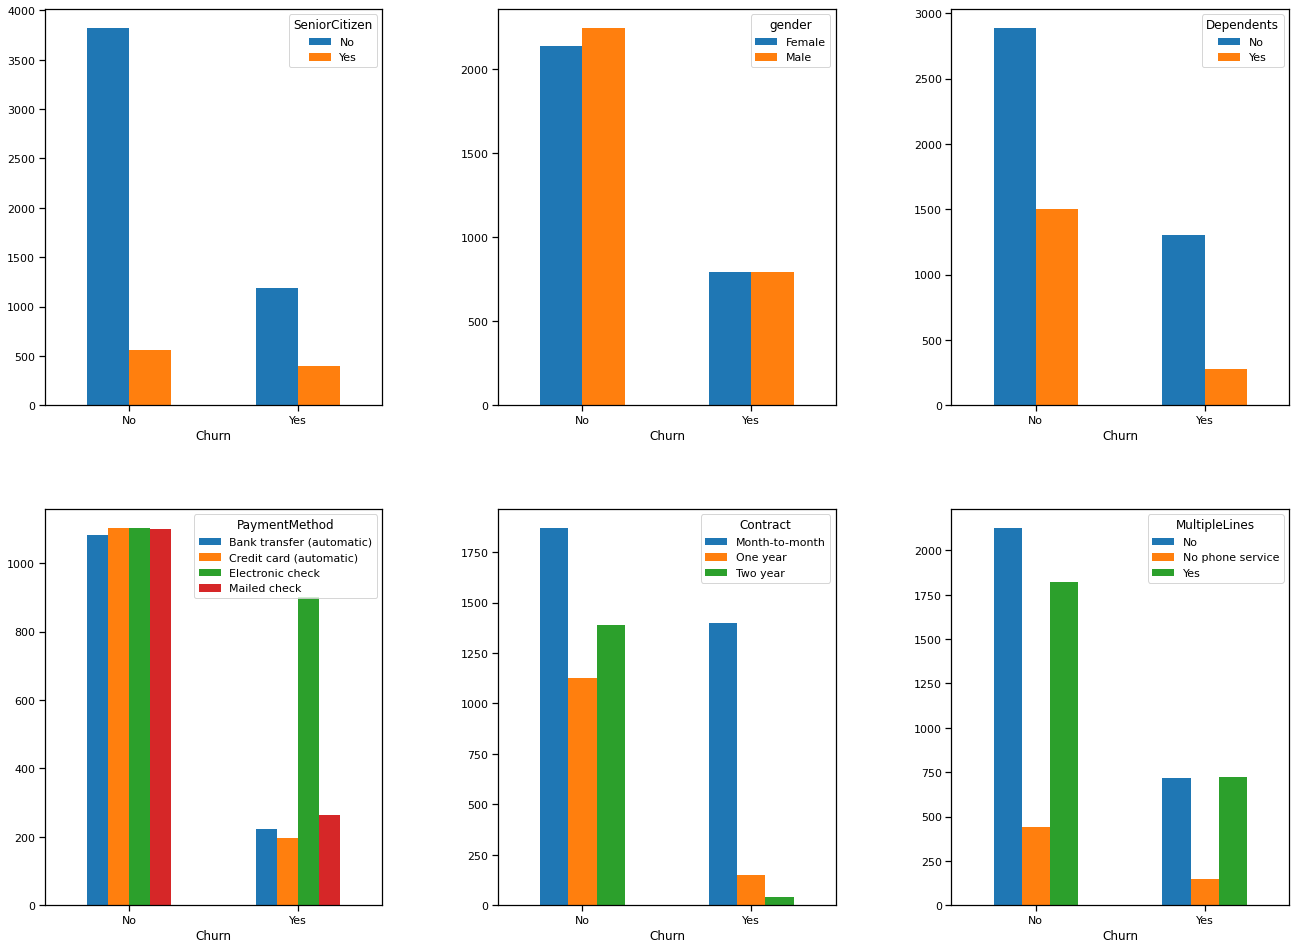

In [155]:
# Grouped bar chart of Churn count for some categorical features
fig,ax=plt.subplots(2,3,figsize=(20, 15))
fig.tight_layout(pad=8)

pd.crosstab(df.Churn,df.SeniorCitizen).plot(ax=ax[0,0],kind='bar').tick_params(labelrotation=0)
pd.crosstab(df.Churn,df.gender).plot(ax=ax[0,1],kind='bar').tick_params(labelrotation=0)
pd.crosstab(df.Churn,df.Dependents).plot(ax=ax[0,2],kind='bar').tick_params(labelrotation=0)
pd.crosstab(df.Churn,df.PaymentMethod).plot(ax=ax[1,0],kind='bar').tick_params(labelrotation=0)
pd.crosstab(df.Churn,df.Contract).plot(ax=ax[1,1],kind='bar').tick_params(labelrotation=0)
pd.crosstab(df.Churn,df.MultipleLines).plot(ax=ax[1,2],kind='bar').tick_params(labelrotation=0)

#Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',

In [156]:
# Encode all categorical variables
ordinal_encoder=OrdinalEncoder()
for features in df[cat_variables].columns:
    df[features] = ordinal_encoder.fit_transform(df[[features]])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,1.0,0.0,1.0,1.0,72,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,24.10,1734.65,0.0
9688-YGXVR,0.0,0.0,0.0,0.0,44,1.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,88.15,3973.20,0.0
9286-DOJGF,0.0,1.0,1.0,0.0,38,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,74.95,2869.85,1.0
6994-KERXL,1.0,0.0,0.0,0.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,55.90,238.50,0.0
2181-UAESM,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,53.45,119.50,0.0


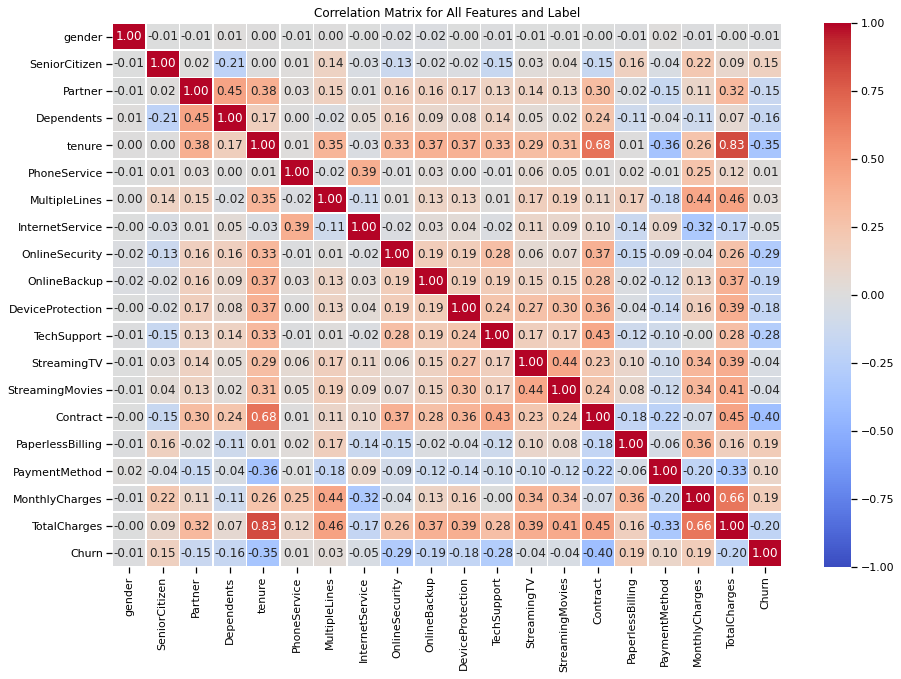

In [157]:
# Correlation matrix for all features and label
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.set_context(context='notebook')
sns.heatmap(corr_matrix, vmin=-1, annot=True, linewidths=0.5, fmt= ".2f", cmap="coolwarm")
plt.title('Correlation Matrix for All Features and Label');
plt.show();

# Data Preparation

## Data Split

In [158]:
# extract the features and target variables
X = df.drop('Churn', axis=1)
y = df['Churn']
X.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,,,,,,,,,,,,,
7010-BRBUU,1.0,0.0,1.0,1.0,72,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,24.10,1734.65
9688-YGXVR,0.0,0.0,0.0,0.0,44,1.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,0.0,1.0,1.0,88.15,3973.20
9286-DOJGF,0.0,1.0,1.0,0.0,38,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,74.95,2869.85
6994-KERXL,1.0,0.0,0.0,0.0,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,2.0,55.90,238.50
2181-UAESM,1.0,0.0,0.0,0.0,2,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,53.45,119.50


In [159]:
# Split dataset into training and test sets using ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print(Counter(y_train))
print(Counter(y_test))

Counter({0.0: 3511, 1.0: 1269})
Counter({0.0: 878, 1.0: 318})


## Feature Scaling

In [161]:
#X_train_enc = xy_train_enc.drop("Churn", axis=1)
# Scale data
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)
sc = StandardScaler().fit(X_train)
X_train_prepared = sc.fit_transform(X_train)

## Oversampling

Due to the class imbalance, it is necessary to conduct the oversampling of the less represented label class.

In [162]:
## SMOTE oversampling

oversample = SMOTE(random_state=1)
X_train_prepared,y_train = oversample.fit_resample(X_train_prepared, y_train.ravel())

## Evaluate Algorithms

In [163]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))

In [164]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train_prepared, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.759047 (0.027261)
KNN: 0.778857 (0.092368)
SVM: 0.796505 (0.039537)


Compare algorithms since the above only shows the mean accuracy

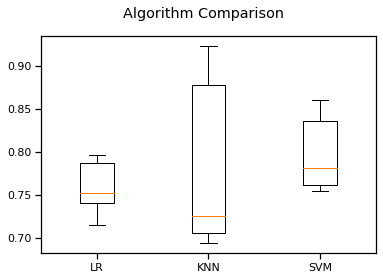

In [165]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [166]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_prepared, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.774609 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.774609 (0.016710) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.774609 (0.016710) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.774609 (0.016710) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.774561 (0.016662) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.774561 (0.016662) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.774561 (0.016662) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.774181 (0.016679) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.774181 (0.016679) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.774229 (0.016590) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.773897 (0.016797) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.773897 (0.016797) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.773802 (0.016785) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.772663 (0.016061) wit

In [167]:
# Tuning KNN
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_prepared, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.826272 using {'n_neighbors': 1}
0.826272 (0.078864) with: {'n_neighbors': 1}
0.793098 (0.093050) with: {'n_neighbors': 3}
0.778857 (0.092368) with: {'n_neighbors': 5}
0.769458 (0.091843) with: {'n_neighbors': 7}
0.758778 (0.094216) with: {'n_neighbors': 9}
0.757780 (0.090976) with: {'n_neighbors': 11}
0.752508 (0.086437) with: {'n_neighbors': 13}
0.747668 (0.087784) with: {'n_neighbors': 15}
0.746387 (0.088304) with: {'n_neighbors': 17}
0.745247 (0.085799) with: {'n_neighbors': 19}
0.740974 (0.087160) with: {'n_neighbors': 21}


In [168]:
# Tuning SVM
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_prepared, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.804056 using {'C': 2.0, 'kernel': 'rbf'}
0.749367 (0.038324) with: {'C': 0.1, 'kernel': 'linear'}
0.755063 (0.039290) with: {'C': 0.1, 'kernel': 'poly'}
0.759758 (0.025320) with: {'C': 0.1, 'kernel': 'rbf'}
0.701081 (0.022209) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.749937 (0.039473) with: {'C': 0.3, 'kernel': 'linear'}
0.767452 (0.040071) with: {'C': 0.3, 'kernel': 'poly'}
0.776564 (0.029210) with: {'C': 0.3, 'kernel': 'rbf'}
0.667897 (0.024598) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.749510 (0.039451) with: {'C': 0.5, 'kernel': 'linear'}
0.773861 (0.040619) with: {'C': 0.5, 'kernel': 'poly'}
0.785679 (0.034059) with: {'C': 0.5, 'kernel': 'rbf'}
0.660633 (0.024911) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.749509 (0.039465) with: {'C': 0.7, 'kernel': 'linear'}
0.775571 (0.042632) with: {'C': 0.7, 'kernel': 'poly'}
0.791377 (0.038030) with: {'C': 0.7, 'kernel': 'rbf'}
0.659352 (0.021903) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.749509 (0.039150) with: {'C': 0.9, 'kernel': 'linear'

In [169]:
# prepare the model
model = SVC(C=2.0, kernel='rbf')
model.fit(X_train_prepared, y_train)
# estimate accuracy on validation dataset
X_test_scaled = sc.transform(X_test)
predictions = model.predict(X_test_scaled)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7583612040133779
[[702 176]
 [113 205]]
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83       878
         1.0       0.54      0.64      0.59       318

    accuracy                           0.76      1196
   macro avg       0.70      0.72      0.71      1196
weighted avg       0.78      0.76      0.76      1196



In [170]:
# prepare the model
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_prepared, y_train)
# estimate accuracy on validation dataset
X_test_scaled = sc.transform(X_test)
predictions = model.predict(X_test_scaled)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.6931438127090301
[[671 207]
 [160 158]]
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.79       878
         1.0       0.43      0.50      0.46       318

    accuracy                           0.69      1196
   macro avg       0.62      0.63      0.62      1196
weighted avg       0.71      0.69      0.70      1196



In [171]:
# prepare the model
model = LogisticRegression(C=100, penalty='l2', solver='newton-cg')
model.fit(X_train_prepared, y_train)
# estimate accuracy on validation dataset
X_test_scaled = sc.transform(X_test)
predictions = model.predict(X_test_scaled)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.7558528428093646
[[659 219]
 [ 73 245]]
              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82       878
         1.0       0.53      0.77      0.63       318

    accuracy                           0.76      1196
   macro avg       0.71      0.76      0.72      1196
weighted avg       0.80      0.76      0.77      1196

